<a href="https://colab.research.google.com/github/NAGARAJVODNALA/AIFINALPROJECT/blob/main/THEPROJECTPULSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHASE 1**

In [1]:
#IMPORT LIBRARIES
!pip install imgkit
!apt-get install -y wkhtmltopdf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  accountsservice acl apg apport apport-symptoms aptdaemon aptdaemon-data
  aspell aspell-en at-spi2-core avahi-daemon avahi-utils bind9-host bind9-libs
  bluez bolt bubblewrap cheese-common colord colord-data cracklib-runtime crda
  cups-pk-helper dbus-x11 dconf-cli desktop-file-utils dictionaries-common
  dns-root-data dnsmasq-base docbook-xml emacsen-common enchant-2
  evolution-data-server evolution-data-server-common fprintd gcr gdm3
  geoclue-2.0 gettext-base gir1.2-accountsservice-1.0 gir1.2-atk-1.0
  gir1.2-atspi-2.0 gir1.2-freedesktop gir1.2-gck-1 gir1.2-gcr-3
  gir1.2-gdesktopenums-3.0 gir1.2-gdkpixbuf-2.0 gir1.2-gdm-1.0
  gir1.2-geoclue-2.0 gir1.2-gnomebluetooth-1.0 gir1.2-gnomedesktop-3.0
  gir1.2-graphene-1.0 gir1.2-gtk-3.0 gir1.

In [2]:
# PHASE 1

# A) Load the dataset
data = pd.read_csv('HTRU_2_DATASET.csv')


In [3]:

# B) Show number of rows and columns
print(f"The dataset HTRU_2_DATASET has {data.shape[0]} rows and {data.shape[1]} columns.")


The dataset HTRU_2_DATASET has 17898 rows and 9 columns.


In [4]:

# C)-----Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64


In [5]:

# D)Shows first five rows of the dataset
data.head()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:

# E)Let's obtain a brief overview of the dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   Class                                         17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<Axes: >

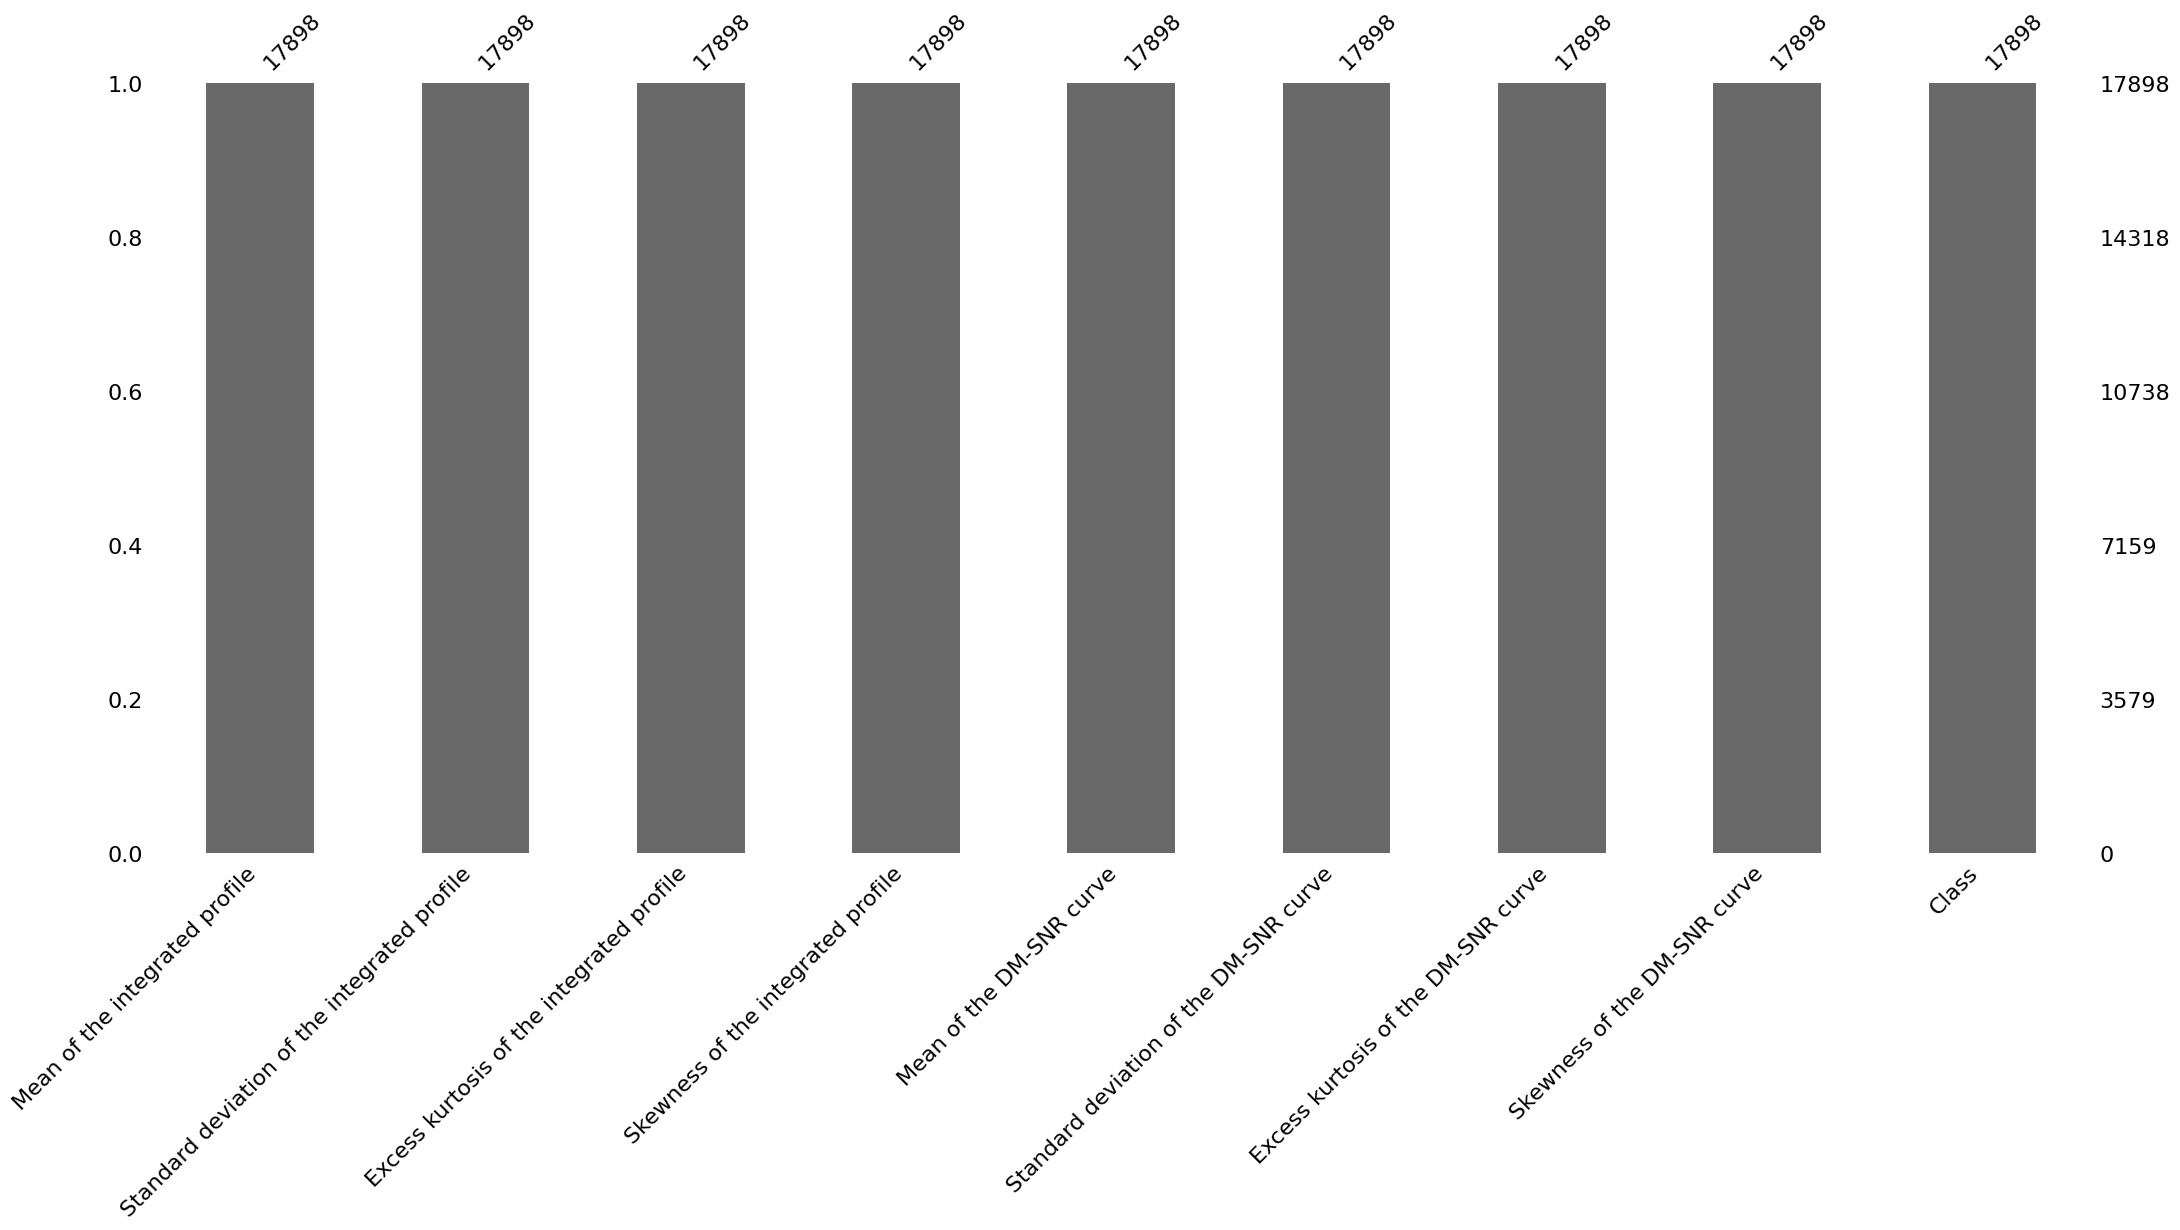

In [7]:

# F)Shows number of rows in each column with bar diagram
msno.bar(data)


In [8]:

# G) Distribute each column , split the input features and output parameters
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


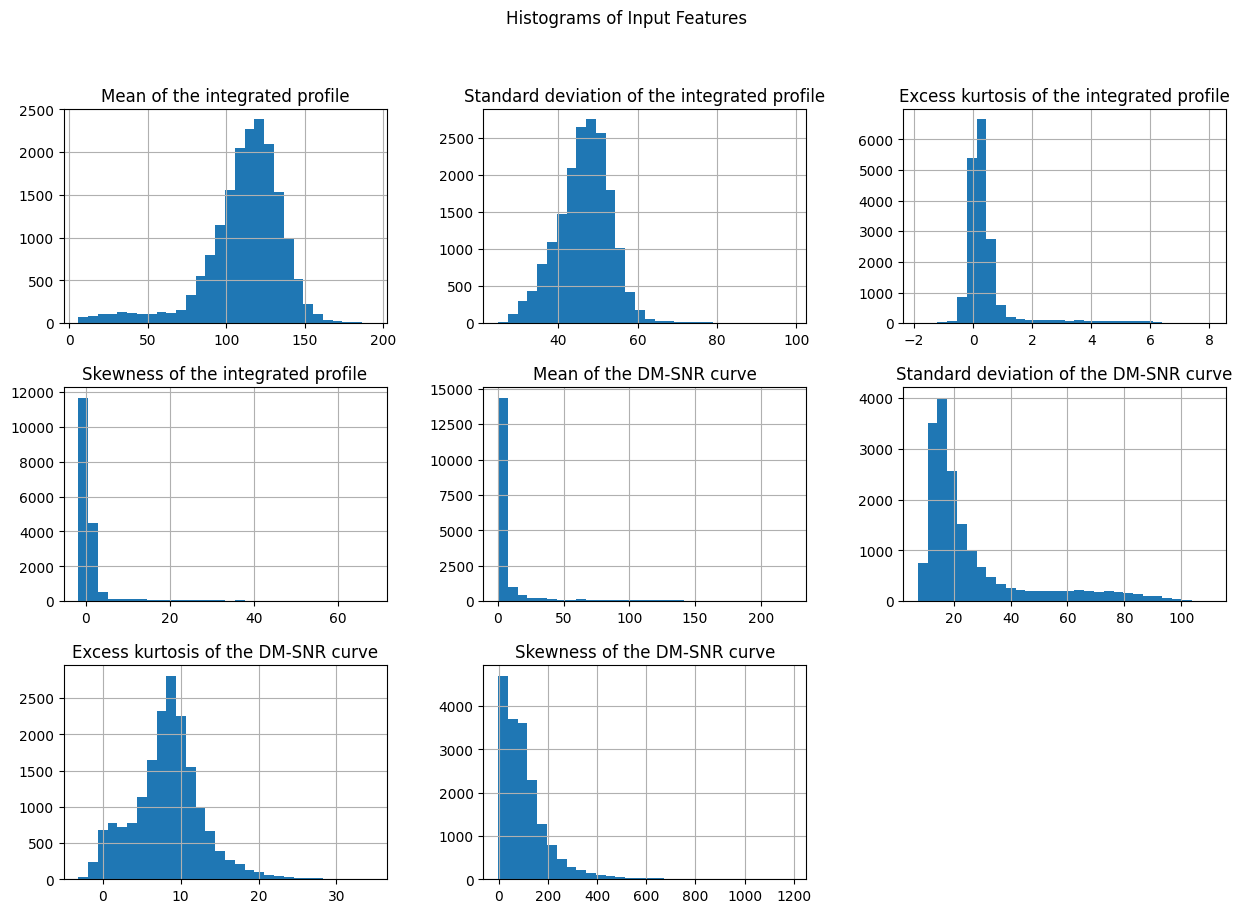

In [9]:

# H)Show distribution of each column
#----- Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()




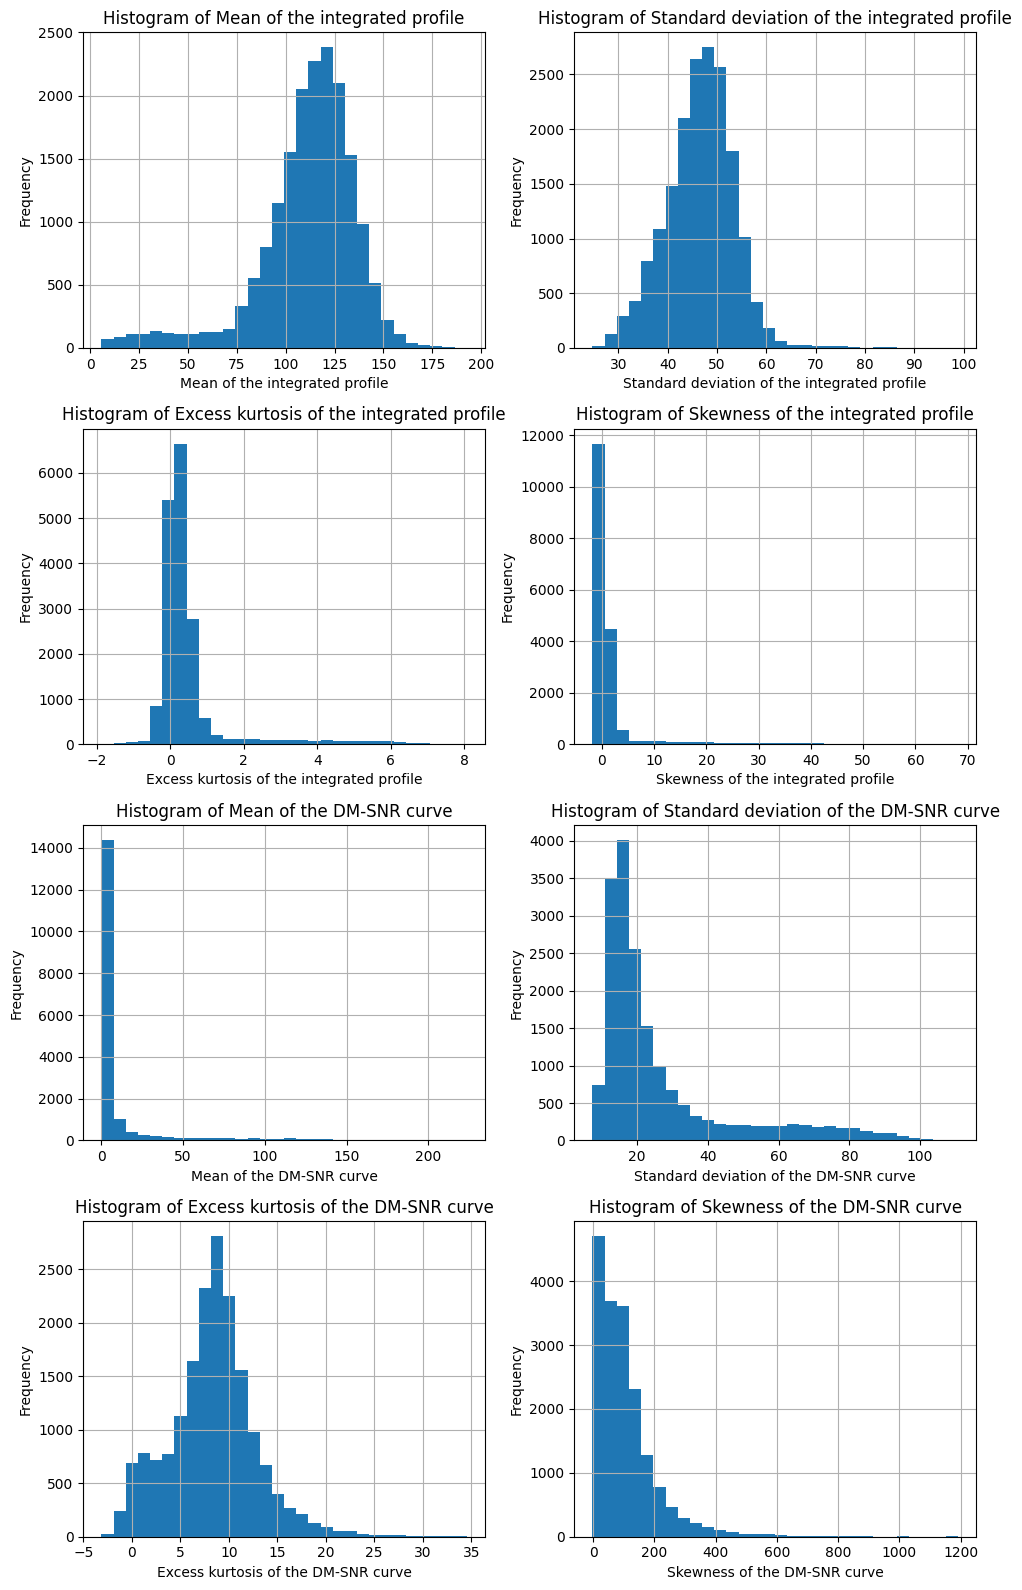

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# H) Show distribution of each column
#----- Histograms for input features
input_features = data.columns[:-1]

# Calculate the number of rows needed for the subplots
num_rows = int(np.ceil(len(input_features) / 2))

# Set up the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))
axes = axes.flatten()

for idx, feature in enumerate(input_features):
    # Plot the histogram in the corresponding subplot
    data[feature].hist(bins=30, ax=axes[idx])
    axes[idx].set_title(f"Histogram of {feature}")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Frequency")
    
    # Save the figure to a file
    plt.savefig(f"{feature}_histogram.png", dpi=300, bbox_inches='tight')

# Show the combined figure with subplots
plt.tight_layout()
plt.show()



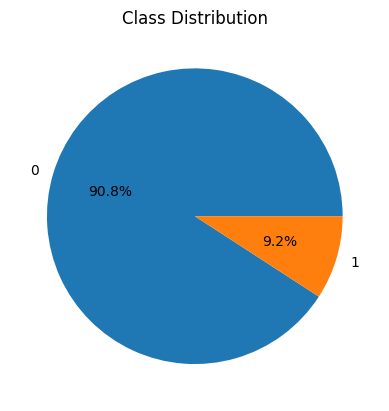

In [11]:
# I) Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")

# Save the figure to a file
plt.savefig("class_distribution_pie_chart.png", dpi=300, bbox_inches='tight')

plt.show()


In [12]:

# J)Unique values of the dtatset
data.nunique()


Mean of the integrated profile                   8626
Standard deviation of the integrated profile    17862
Excess kurtosis of the integrated profile       17897
Skewness of the integrated profile              17898
Mean of the DM-SNR curve                         9000
Standard deviation of the DM-SNR curve          17894
Excess kurtosis of the DM-SNR curve             17895
Skewness of the DM-SNR curve                    17895
Class                                               2
dtype: int64

**#PRINT 10 ROWS OF DATASET BEFORE NORMALIZING**

In [13]:
#PRINT 10 ROWS OF DATASET BEFORE NORMALIZING
import pandas as pd
from IPython.display import display
import imgkit

#Showing data before normalization
# D) Shows first 10 rows of the dataset
first_10_rows = data.head(10)

# Display the first 10 rows in table format
display(first_10_rows.style.set_caption("First 10 Rows of the Dataset"))

# Save the table as an image in Google Colab
table_html = first_10_rows.to_html(index=False)
imgkit.from_string(table_html, 'first_10_rows.png', options={'quality': 100})

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [14]:
# K) Normalize the data
#X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

data_normalized = (data.iloc[:, :-1] - data.iloc[:, :-1].min()) / (data.iloc[:, :-1].max() - data.iloc[:, :-1].min())
data_normalized['Class'] = data.iloc[:, -1]



**#PRINT 10 ROWS OF DATASET AFTER NORMALIZING**

In [15]:
#PRINT 10 ROWS OF DATASET AFTER NORMALIZING

# Display the first 10 rows of the normalized data in table format
display(data_normalized.head(10).style.set_caption("First 10 Rows of Normalized Data"))

# Save the table as an image in Google Colab
table_html = data_normalized.head(10).to_html(index=False)
imgkit.from_string(table_html, 'first_10_rows_normalized.png', options={'quality': 100})

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0
5,0.469784,0.296271,0.242110,0.031600,0.006376,0.069473,0.365216,0.111797,0
6,0.608507,0.324200,0.191792,0.024033,0.003522,0.018487,0.593047,0.403808,0
7,0.666848,0.203657,0.172710,0.031211,0.004514,0.067865,0.442652,0.167827,0
8,0.543014,0.376384,0.234145,0.028075,0.009493,0.068910,0.322202,0.092164,0
9,0.543055,0.198961,0.235472,0.042275,0.017323,0.170521,0.279634,0.050095,0


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

# **PHASE 2**

In [16]:
# PHASE 2

# L)NOW BUILD A MODEL WITH SINGLE LAYER AND SINGLE NEURON

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# M)Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=0)


# N)Print the accuracy
_, accuracy_single_layer = single_layer_model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))



Single Layer Model Accuracy: 97.27


In [17]:
# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS

# PART 2: Multilayer model with more layers and more neurons
multi_layer_model = Sequential()
multi_layer_model.add(Dense(16, activation='relu', input_dim=8))
multi_layer_model.add(Dense(8, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Q)Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy: %.2f' % (accuracy_multi_layer * 100))




Multilayer Model Accuracy: 97.59


In [18]:
# O)BUILD A MULTILAYER MODEL WITH MORE  NEURONS THAN PREVIOUS PART 3

# PART 3: Multilayer model with more layers and more neurons

multi_layer_model2 = Sequential()
multi_layer_model2.add(Dense(128, activation='relu', input_dim=8))
multi_layer_model2.add(Dense(64, activation='relu'))
multi_layer_model2.add(Dense(32, activation='relu'))
multi_layer_model2.add(Dense(16, activation='relu'))
multi_layer_model2.add(Dense(1, activation='sigmoid'))

multi_layer_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer2 = multi_layer_model2.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Q)Print the accuracy
_, accuracy_multi_layer2 = multi_layer_model2.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy 2: %.2f' % (accuracy_multi_layer2 * 100))




Multilayer Model Accuracy 2: 97.41


In [19]:
# O)BUILD A MULTILAYER MODEL WITH MORE NEURONS -------------- 

# PART 4: Multilayer model with more layers and more neurons

multi_layer_model3 = Sequential()
multi_layer_model3.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model3.add(Dense(128, activation='relu'))
multi_layer_model3.add(Dense(64, activation='relu'))
multi_layer_model3.add(Dense(32, activation='relu'))
multi_layer_model3.add(Dense(1, activation='sigmoid'))
multi_layer_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# P)Train the data using Keras, TensorFlow
history_multi_layer3 = multi_layer_model3.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Q)Print the accuracy
_, accuracy_multi_layer3 = multi_layer_model3.evaluate(X, y, verbose=0)
print('Multilayer Model Accuracy 3: %.2f' % (accuracy_multi_layer3 * 100))




Multilayer Model Accuracy 3: 97.23


In [20]:
# PHASE 2 - Additional tasks

# R) Add output as an additional input feature
X_extended = np.column_stack((X, y))

# S) Define a function that represents the model
def predict(model, input_data):
    return model.predict(input_data)

# T) Build a multilayer model with output as an additional input feature
multi_layer_model_ext = Sequential()
multi_layer_model_ext.add(Dense(128, activation='relu', input_dim=9))
multi_layer_model_ext.add(Dense(64, activation='relu'))
multi_layer_model_ext.add(Dense(32, activation='relu'))
multi_layer_model_ext.add(Dense(16, activation='relu'))
multi_layer_model_ext.add(Dense(1, activation='sigmoid'))
multi_layer_model_ext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# U) Train the model with the extended input data
history_multi_layer_ext = multi_layer_model_ext.fit(X_extended, y, epochs=10, batch_size=32, verbose=0)

# V) Evaluate the accuracy
_, accuracy_multi_layer_ext = multi_layer_model_ext.evaluate(X_extended, y, verbose=0)
print('Multilayer Model with Extended Input Accuracy: %.2f' % (accuracy_multi_layer_ext * 100))

# W) Create a function that serves as a prediction model
def prediction_model(model, input_data):
    return predict(model, input_data)

# X) Test the prediction function with an example
test_input = X_extended[0]  # Take the first row of the extended input data as an example
prediction = prediction_model(multi_layer_model_ext, test_input.reshape(1, -1))
print(f'Prediction for the test input: {prediction}')


Multilayer Model with Extended Input Accuracy: 99.97
1/1 [==============================] - 0s 93ms/step
Prediction for the test input: [[2.3709632e-08]]


In [21]:
# Y)Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Z)Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# A1)Create and train a logistic regression model with increased max_iter
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_scaled, y)

# B1)Make predictions on the entire dataset
y_pred = log_reg_model.predict(X_scaled)

# C1)Calculate the accuracy
log_reg_accuracy = accuracy_score(y, y_pred)
print('Logistic Regression Model Accuracy: %.2f' % (log_reg_accuracy * 100))


Logistic Regression Model Accuracy: 97.90


In [22]:
# D1)Import required libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# E1)Create and train a random baseline classifier on the entire dataset
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X, y)

# F1)Make predictions on the entire dataset
y_pred = random_baseline_model.predict(X)

# G1)Calculate the accuracy
random_baseline_accuracy = accuracy_score(y, y_pred)
print('Random Baseline Classifier Accuracy: %.2f' % (random_baseline_accuracy * 100))


Random Baseline Classifier Accuracy: 83.42


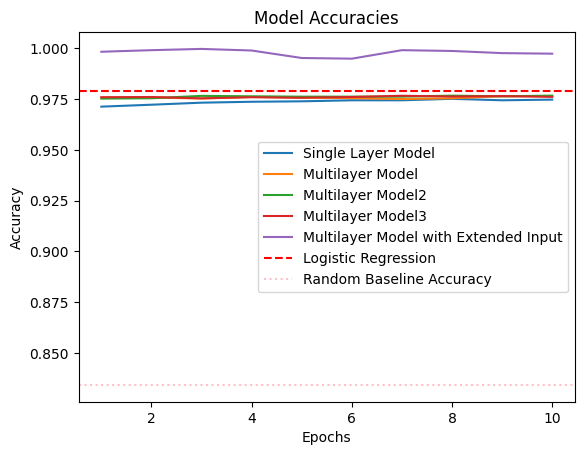

In [23]:
# H1)Import additional library for plotting
import matplotlib.pyplot as plt

# I1)Train the single layer model for 10 epochs
history_single_layer = single_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# J1)Train the multilayer model for 10 epochs
history_multi_layer = multi_layer_model.fit(X, y, epochs=10, batch_size=32, verbose=0)
history_multi_layer2 = multi_layer_model2.fit(X, y, epochs=10, batch_size=32, verbose=0)
history_multi_layer3 = multi_layer_model3.fit(X, y, epochs=10, batch_size=32, verbose=0)

# K1)Train the multilayer model with extended input for 10 epochs
history_multi_layer_ext = multi_layer_model_ext.fit(X_extended, y, epochs=10, batch_size=32, verbose=0)

# L1)Extract the accuracies
acc_single_layer = history_single_layer.history['accuracy']
acc_multi_layer = history_multi_layer.history['accuracy']
acc_multi_layer2= history_multi_layer2.history['accuracy']
acc_multi_layer3 = history_multi_layer3.history['accuracy']
acc_multi_layer_ext = history_multi_layer_ext.history['accuracy']

# M1)Create an array with the epoch numbers
epochs = range(1, 11)

# N1)Plot the accuracies
plt.plot(epochs, acc_single_layer, label='Single Layer Model')
plt.plot(epochs, acc_multi_layer, label='Multilayer Model')
plt.plot(epochs, acc_multi_layer2, label='Multilayer Model2')
plt.plot(epochs, acc_multi_layer3, label='Multilayer Model3')
plt.plot(epochs, acc_multi_layer_ext, label='Multilayer Model with Extended Input')
plt.axhline(log_reg_accuracy, color='red', linestyle='--', label='Logistic Regression')
plt.axhline(random_baseline_accuracy, color='pink', linestyle='dotted', label='Random Baseline Accuracy')

# O1)Add title and labels for axes
plt.title('Model Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# P1)Add a legend
plt.legend()

# Q1)Display the plot
plt.show()


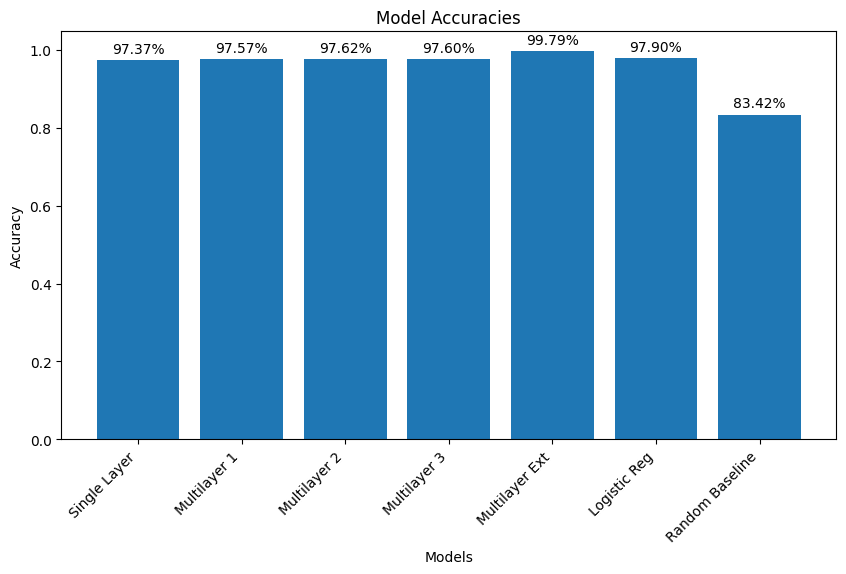

In [24]:
#REPRESENTATION USING BAR DIAGARAM

# Calculate the average accuracies
avg_acc_single_layer = np.mean(acc_single_layer)
avg_acc_multi_layer = np.mean(acc_multi_layer)
avg_acc_multi_layer2 = np.mean(acc_multi_layer2)
avg_acc_multi_layer3 = np.mean(acc_multi_layer3)
avg_acc_multi_layer_ext = np.mean(acc_multi_layer_ext)

# Prepare data for bar plot
models = ['Single Layer', 'Multilayer 1', 'Multilayer 2', 'Multilayer 3', 'Multilayer Ext', 'Logistic Reg', 'Random Baseline']
accuracies = [avg_acc_single_layer, avg_acc_multi_layer, avg_acc_multi_layer2, avg_acc_multi_layer3, avg_acc_multi_layer_ext, log_reg_accuracy, random_baseline_accuracy]

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
bars = ax.bar(models, accuracies)


# Add percentage on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height * 100),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and labels for axes
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Rotate model names and adjust spacing
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()


#**PHASE 3**

In [25]:
# R1)Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [26]:
# S1) Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]


# Print training and validation data
print("Training data (X_train):")
print(X_train)
print("\nTraining labels (y_train):")
print(y_train)

print("\nValidation data (X_val):")
print(X_val)
print("\nValidation labels (y_val):")
print(y_val)

Training data (X_train):
[[ 8.83671875e+01  4.92166561e+01  9.56116291e-01 ...  1.38277021e+01
   1.07032011e+01  1.43877378e+02]
 [ 1.42429688e+02  5.07083702e+01 -3.52714830e-01 ...  3.54876571e+01
   4.08089565e+00  1.68133086e+01]
 [ 1.16421875e+02  3.71697141e+01  2.84690532e-01 ...  1.94776476e+01
   7.93532265e+00  6.83917465e+01]
 ...
 [ 9.14453125e+01  4.80525117e+01  4.77919770e-01 ...  8.35303758e+01
  -1.28185353e-01 -1.76018992e+00]
 [ 1.18093750e+02  5.41283829e+01  2.66658726e-01 ...  1.84170920e+01
   8.35714948e+00  8.09629884e+01]
 [ 1.36445312e+02  5.48662876e+01 -1.58676799e-01 ...  1.78141676e+01
   1.10580288e+01  1.27143392e+02]]

Training labels (y_train):
[0 0 0 ... 0 0 0]

Validation data (X_val):
[[ 1.22023438e+02  4.65034382e+01  5.19942751e-01 ...  1.88934232e+01
   8.08082434e+00  7.70239593e+01]
 [ 1.22812500e+02  4.72731012e+01  3.79792540e-01 ...  1.01944947e+01
   1.90973027e+01  4.10108786e+02]
 [ 1.27414062e+02  5.48802001e+01  2.12279100e-02 ...  5.

#**#SINGLE LAYER MODEL**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# T1)Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)

# U1)Print the accuracy
_, accuracy_single_layer_train = single_layer_model.evaluate(X_train, y_train, verbose=0)
_, accuracy_single_layer_val = single_layer_model.evaluate(X_val, y_val, verbose=0)
print('Single Layer Model Training Accuracy: %.2f' % (accuracy_single_layer_train * 100))
print('Single Layer Model Validation Accuracy: %.2f' % (accuracy_single_layer_val * 100))


Single Layer Model Training Accuracy: 96.47
Single Layer Model Validation Accuracy: 96.28


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred_val = (single_layer_model.predict(X_val) > 0.5).astype("int32")

# Calculate and print recall, precision, and F1 score
print('Recall: %.2f' % (recall_score(y_val, y_pred_val) * 100))
print('Precision: %.2f' % (precision_score(y_val, y_pred_val) * 100))
print('F1 Score: %.2f' % (f1_score(y_val, y_pred_val) * 100))



112/112 [==============================] - 0s 1ms/step
Recall: 69.59
Precision: 89.14
F1 Score: 78.16


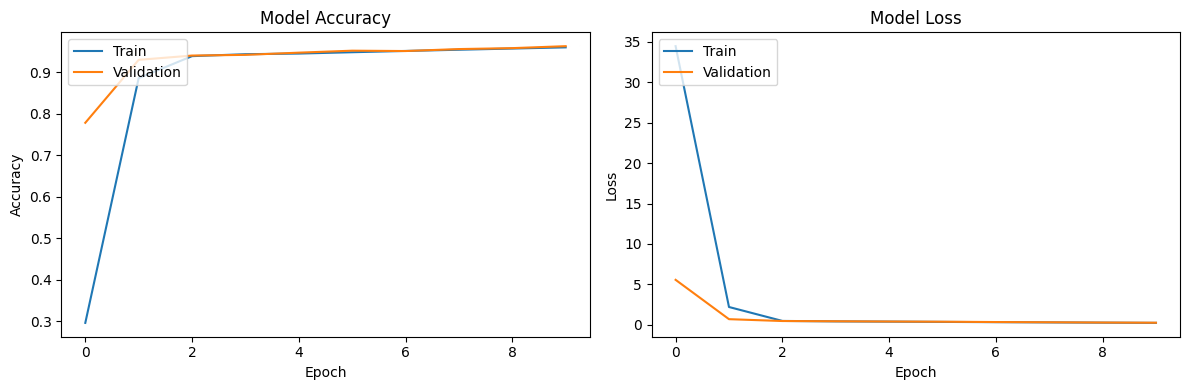

In [41]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_single_layer.history['accuracy'])
plt.plot(history_single_layer.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_single_layer.history['loss'])
plt.plot(history_single_layer.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


#**#MULTI LAYER MODEL**

Epoch 1/10
448/448 [==============================] - 2s 3ms/step - loss: 0.7438 - accuracy: 0.9269 - val_loss: 0.4865 - val_accuracy: 0.9514
Epoch 2/10
448/448 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.9663 - val_loss: 0.3156 - val_accuracy: 0.9679
Epoch 3/10
448/448 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9695 - val_loss: 0.2488 - val_accuracy: 0.9698
Epoch 4/10
448/448 [==============================] - 1s 2ms/step - loss: 0.2186 - accuracy: 0.9716 - val_loss: 0.2127 - val_accuracy: 0.9696
Epoch 5/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1865 - accuracy: 0.9721 - val_loss: 0.1897 - val_accuracy: 0.9687
Epoch 6/10
448/448 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9725 - val_loss: 0.1733 - val_accuracy: 0.9684
Epoch 7/10
448/448 [==============================] - 1s 2ms/step - loss: 0.1530 - accuracy: 0.9719 - val_loss: 0.1600 - val_accuracy: 0.9707
Epoch 

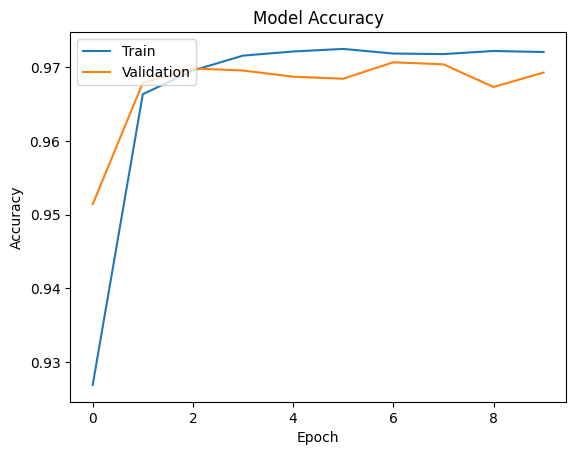

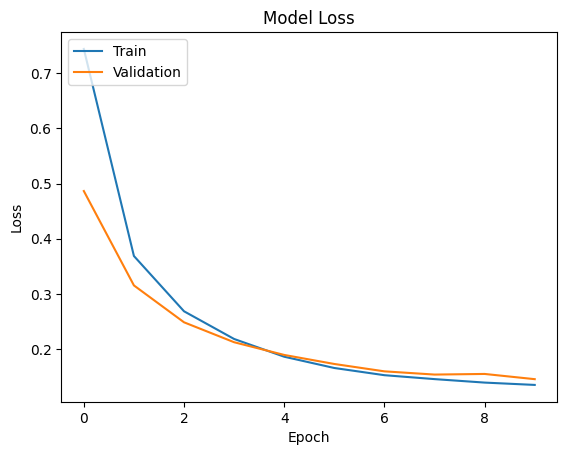

In [29]:
# T1) Plotting, graphs, visualization
# Train model with checkpointing and L1_L2 regularization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# U1)Use multi_layer_model instead of model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

multi_layer_modelSS = Sequential()
multi_layer_modelSS.add(Dense(16, activation='relu', input_dim=8, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(1, activation='sigmoid'))
multi_layer_modelSS.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = multi_layer_modelSS.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[checkpoint, early_stopping])

# V1)Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:

# Print accuracy and loss on both training and validation dataset
_, train_accuracyML = multi_layer_modelSS.evaluate(X_train, y_train, verbose=0)
_, val_accuracyML = multi_layer_modelSS.evaluate(X_val, y_val, verbose=0)
print('Training Accuracy: %.2f' % (train_accuracyML * 100))
print('Validation Accuracy: %.2f' % (val_accuracyML * 100))

# W1) Print recall, precision, F1-score
y_val_pred = (multi_layer_modelSS.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1_score = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1_score)


Training Accuracy: 97.21
Validation Accuracy: 96.93
112/112 [==============================] - 0s 2ms/step
Recall: 0.71
Precision: 0.96
F1 Score: 0.82


#**#LOGISTIC REGRESSION**

In [63]:
# X1)Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Y1)Create and train a logistic regression model with increased max_iter
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Z1)Make predictions on the validation set
y_pred_val = log_reg_model.predict(X_val)

# A2)Calculate the accuracy on the validation set
log_reg_val_accuracy = accuracy_score(y_val, y_pred_val)
print('Logistic Regression Model Validation Accuracy: %.2f' % (log_reg_val_accuracy * 100))


Logistic Regression Model Validation Accuracy: 97.68


In [64]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Make predictions on the training set
y_pred_train = log_reg_model.predict(X_train)

# Calculate the training accuracy
log_reg_train_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate the validation accuracy
log_reg_val_accuracy = accuracy_score(y_val, y_pred_val)

# Calculate recall, precision, and F1 score for the validation set
recall = recall_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

# Print the metrics
print('Logistic Regression Model Training Accuracy: %.2f' % (log_reg_train_accuracy * 100))
print('Logistic Regression Model Validation Accuracy: %.2f' % (log_reg_val_accuracy * 100))
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)


Logistic Regression Model Training Accuracy: 97.95
Logistic Regression Model Validation Accuracy: 97.68
Recall: 0.80
Precision: 0.95
F1 Score: 0.87


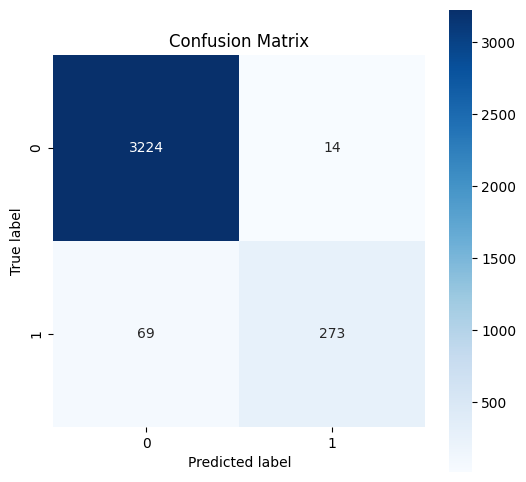

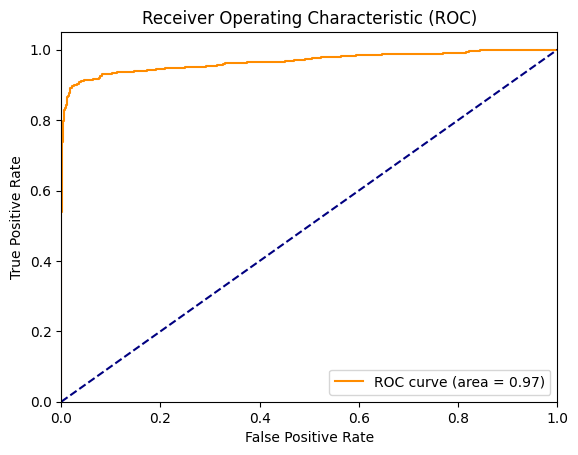

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# B2) Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_val contains the true labels and y_pred_val_prob contains the predicted probabilities
y_pred_val_prob = log_reg_model.predict_proba(X_val)[:, 1] # Replace this with your predicted probabilities
fpr, tpr, _ = roc_curve(y_val, y_pred_val_prob)
roc_auc = roc_auc_score(y_val, y_pred_val_prob)

# Save the confusion matrix plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='.0f', square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrixLR.png', bbox_inches='tight')
plt.show()

# Save the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_curveLR.png', bbox_inches='tight')
plt.show()
from google.colab import files

files.download('confusion_matrixLR.png')
files.download('roc_curveLR.png')

#**#Random Baseline Classifier**

In [34]:
# B2)Import required libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# C2)Create and train a random baseline classifier
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X_train, y_train)

# D2)Make predictions on the validation set
y_pred_val = random_baseline_model.predict(X_val)

# E2)Calculate the accuracy on the validation set
random_baseline_val_accuracy = accuracy_score(y_val, y_pred_val)
print('Random Baseline Classifier Validation Accuracy: %.2f' % (random_baseline_val_accuracy * 100))


Random Baseline Classifier Validation Accuracy: 83.69


In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Create and train a random baseline classifier
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = random_baseline_model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training Accuracy: %.2f' % (train_accuracy * 100))

# Make predictions on the validation set
y_pred_val = random_baseline_model.predict(X_val)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy: %.2f' % (validation_accuracy * 100))

# Calculate recall on the validation set
recall = recall_score(y_val, y_pred_val)
print('Recall: %.2f' % recall)

# Calculate precision on the validation set
precision = precision_score(y_val, y_pred_val)
print('Precision: %.2f' % precision)

# Calculate F1 score on the validation set
f1 = f1_score(y_val, y_pred_val)
print('F1 Score: %.2f' % f1)


Training Accuracy: 83.62
Validation Accuracy: 83.69
Recall: 0.10
Precision: 0.11
F1 Score: 0.10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

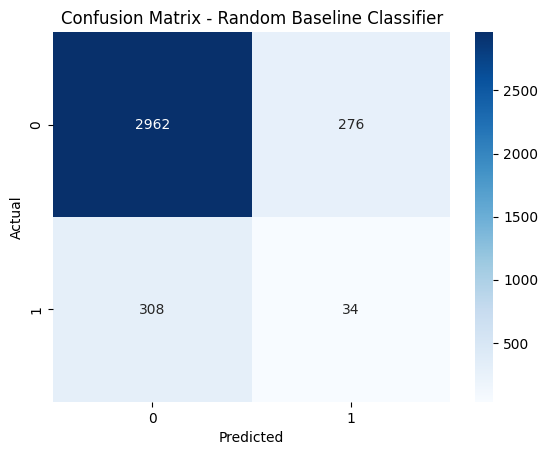

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

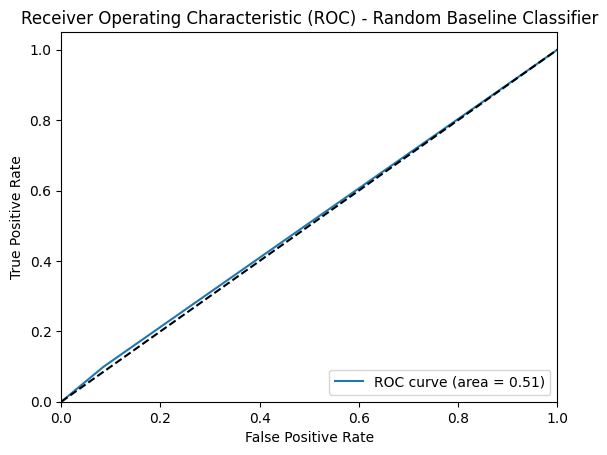

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from google.colab import files

# Plot confusion matrix
conf_mat = confusion_matrix(y_val, y_pred_val)
fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Random Baseline Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.savefig('confusion_matrix.png', dpi=300)
files.download('confusion_matrix.png')
plt.show()

# Plot ROC curve
y_pred_val_proba = random_baseline_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Baseline Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=300)
files.download('roc_curve.png')
plt.show()


#**#Custom_prediction_function**

In [51]:
# Import required libraries
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def my_custom_prediction_function(model, features):
    # Check the type of the model
    if isinstance(model, XGBClassifier):
        # For tree-based models, get the predictions and return them
        result = model.predict_proba(features)[:, 1]
    else:
        # For linear models, get the weights and bias from the model
        weights = model.coef_[0]
        bias = model.intercept_[0]

        # Calculate the sum of the weighted features and add the bias
        z = np.dot(features, weights) + bias

        # Apply the sigmoid activation function to get the predicted probability
        result = 1 / (1 + np.exp(-z))

    return result



# Get the model's predictions for the training data using the custom prediction function
y_train_pred = (my_custom_prediction_function(model, X_train) > 0.5).astype("int32")

# Get the model's predictions for the validation data using the custom prediction function
y_val_pred = (my_custom_prediction_function(model, X_val) > 0.5).astype("int32")

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Calculate the recall for the validation data
recall = recall_score(y_val, y_val_pred)

# Calculate the precision for the validation data
precision = precision_score(y_val, y_val_pred)

# Calculate the F1 score for the validation data
f1 = f1_score(y_val, y_val_pred)

# Print the metrics
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Training Accuracy: 99.86%
Validation Accuracy: 97.79%
Recall: 82.75%
Precision: 93.40%
F1 Score: 87.75%


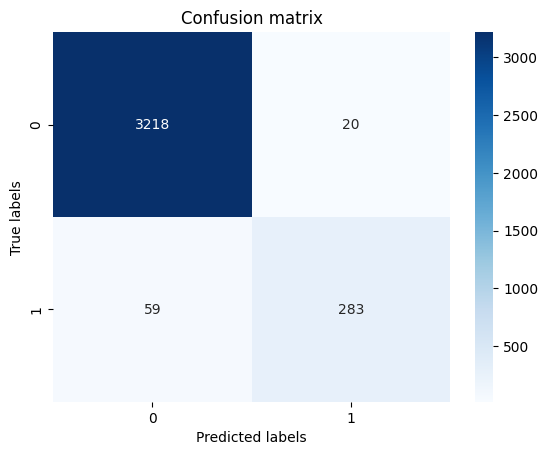

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for the validation data
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


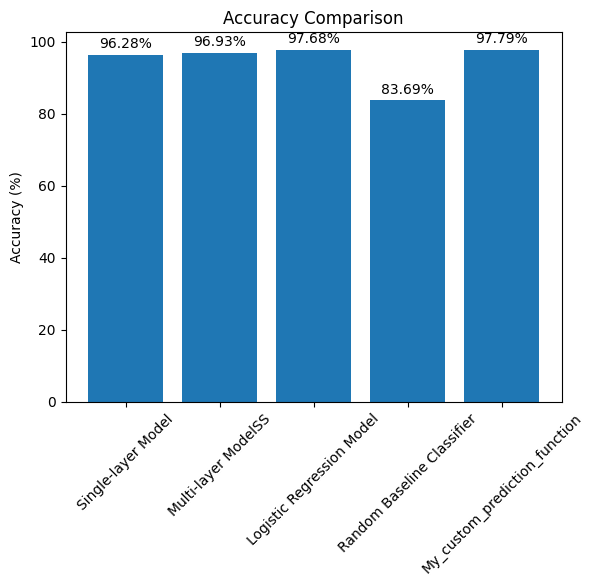

In [60]:
import matplotlib.pyplot as plt

# F2)Store the accuracy scores
accuracy_scores = {'Single-layer Model': accuracy_single_layer_val * 100,
    'Multi-layer ModelSS': val_accuracyML * 100,
    'Logistic Regression Model': log_reg_val_accuracy * 100,
    'Random Baseline Classifier': random_baseline_val_accuracy * 100,
    'My_custom_prediction_function':val_accuracy*100
}

# G2)Create a bar graph
fig, ax = plt.subplots()
bar_positions = range(len(accuracy_scores))
bar_heights = accuracy_scores.values()

bars = ax.bar(bar_positions, bar_heights)

# H2)Set the ticks and labels for the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(accuracy_scores.keys(), rotation=45)

# I2)Set the title and labels
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy (%)')

# J2)Function to add percentage values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# K2)Call the function to add percentage values
autolabel(bars)

# L2)Show the plot
plt.show()


#**PHASE 4 FEATURE REDUCTION**

FORWARD SELECTION WITH CHECKPOINTING

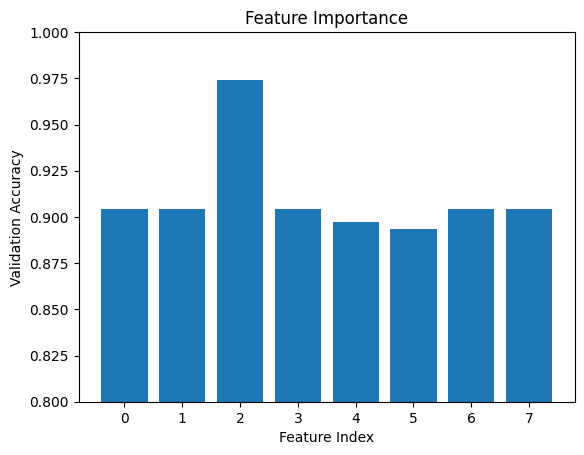

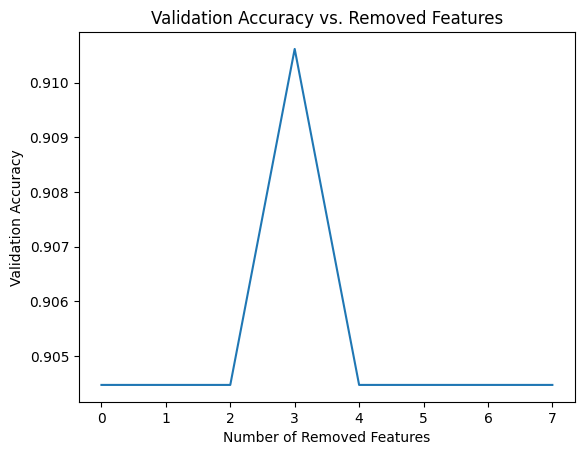

In [38]:


# M2)Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)

    checkpoint = ModelCheckpoint(f'single_feature_model_{i}.h5', monitor='val_accuracy', save_best_only=True)
    
    single_feature_model.fit(X_train_single, y_train, epochs=10, batch_size=32, verbose=0,
                             validation_data=(X_val_single, y_val), callbacks=[checkpoint])
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=0)
    val_accuracies.append(single_feature_val_accuracy)

# N2)Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.show()

# O2)Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    checkpoint = ModelCheckpoint(f'reduced_features_model_{i}.h5', monitor='val_accuracy', save_best_only=True)

    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=0,
                               validation_data=(X_val_reduced, y_val), callbacks=[checkpoint])
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=0)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# P2)Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.show()


#**PHASE 4 WITH SHAP FEATURE REDUCTION TECHNIQUE**

In [39]:
!pip install lime
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=679ae0d957a6015a1ec52286d38459147575db6e6effe5b585630372d6137f0a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 13.6 MB/s eta 0:00:00


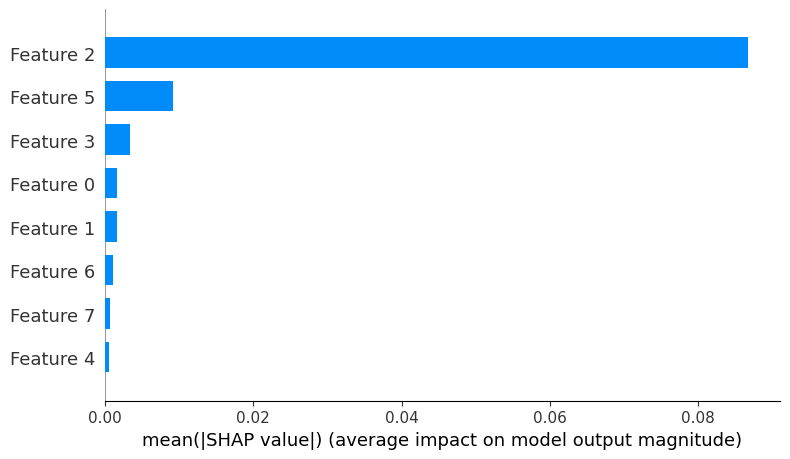

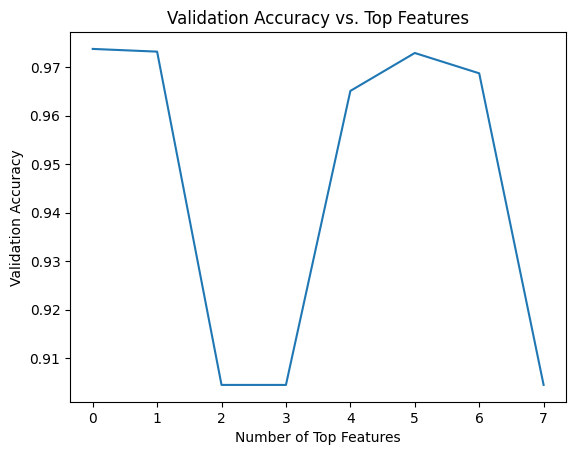

In [40]:
# PHASE 4
# Q2)FEATURE SELECTION USING SHAP

import shap

# R2) Feature importance using SHAP values
# Train an XGBoost model
import xgboost
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# S2)Explain the model's predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# T2)Plot the SHAP values for each feature
shap.summary_plot(shap_values, X_train, plot_type="bar")

# U2) Remove unimportant features and compare
num_features = X_train.shape[1]
sorted_indices = np.argsort(np.abs(shap_values.values).mean(0))[::-1]
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i+1]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i+1))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    reduced_features_model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, verbose=0)

    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=0)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# V2)Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Top Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Top Features')
plt.show()
